# Local Row-level Model Temporal Trend Analysis

In [7]:
import pandas as pd

In [8]:
# Lets load in the raw prediction data for a single model with binning that includes timestamps
# We can use the predictions.parquet file which is used for the R analysis script to generate the plots


In [9]:
path = 'data/exp-43-lstm-local-rounded-cut_100/predictions.parquet'
# Load the data
df = pd.read_parquet(path)
# Check the data
print(df.head())
# Check the columns
print(df.columns)
# Check the shape
print(df.shape)
# Check the dtypes
print(df.dtypes)
# check the info
print(df.info())

   in_lock_sequences_id   in_lock_start_time     in_lock_end_time  \
0                     1  1734442173000567000  1734442173000608000   
1                     1  1734442173000567000  1734442173000608000   
2                     1  1734442173000567000  1734442173000608000   
3                     1  1734442173000567000  1734442173000608000   
4                     2  1734442173000581000  1734442173000612000   

    gt_lock_start_time     gt_lock_end_time model  \
0  1734442173000612000  1734442173000629000  lstm   
1  1734442173000612000  1734442173000629000  lstm   
2  1734442173000612000  1734442173000629000  lstm   
3  1734442173000612000  1734442173000629000  lstm   
4  1734442173000615000  1734442173000655000  lstm   

                            data  train_data_percent_used  epochs  batch_size  \
0  data/fixed/row_sep/ORDERS.csv                      1.0      30          32   
1  data/fixed/row_sep/ORDERS.csv                      1.0      30          32   
2  data/fixed/row_sep/O

In [10]:
# Lets make sure we are sorted by the in_lock_start_time in ascending order
df = df.sort_values(by=['in_lock_start_time'])
df['in_lock_start_time'] = df['in_lock_start_time'] - df['in_lock_start_time'].min()  # center the time around 0

In [11]:
df['in_lock_start_time'].max(), df['in_lock_start_time'].min()

(337999652000, 0)

In [12]:
step_size = 1e10/4
num_plots = 4

Interval 0: 79 unique gt_pageid
Interval 0: 288750 gt_pageid


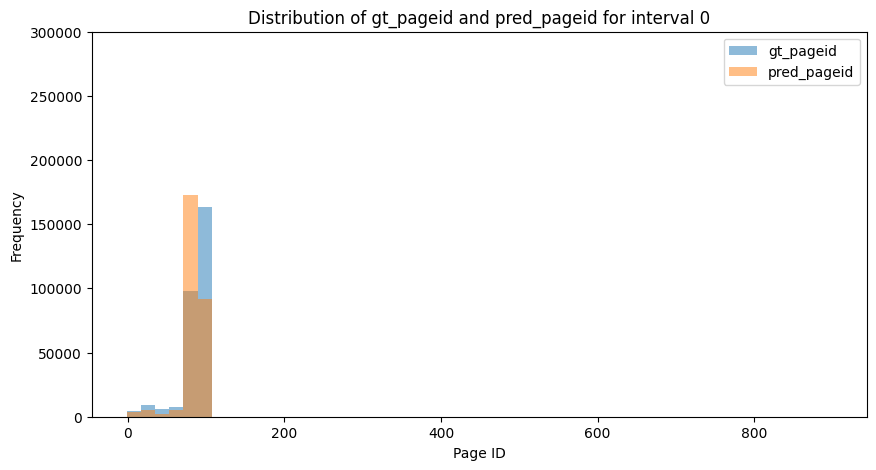

Interval 1: 100 unique gt_pageid
Interval 1: 965580 gt_pageid


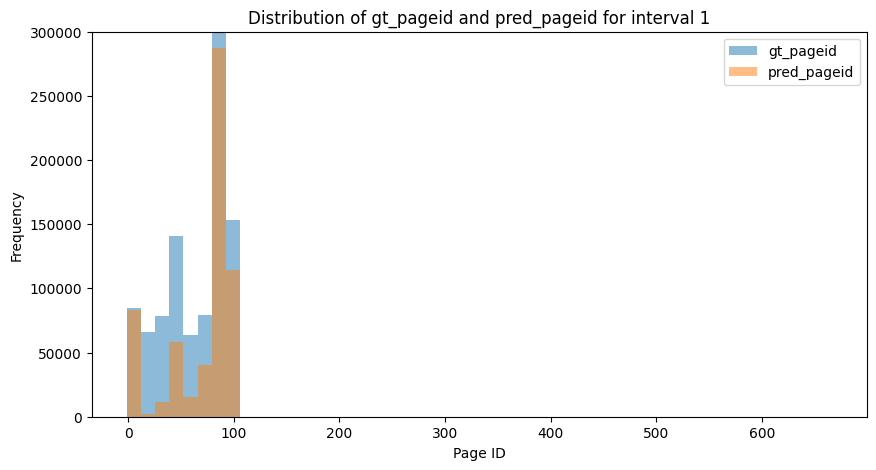

Interval 2: 100 unique gt_pageid
Interval 2: 1139400 gt_pageid


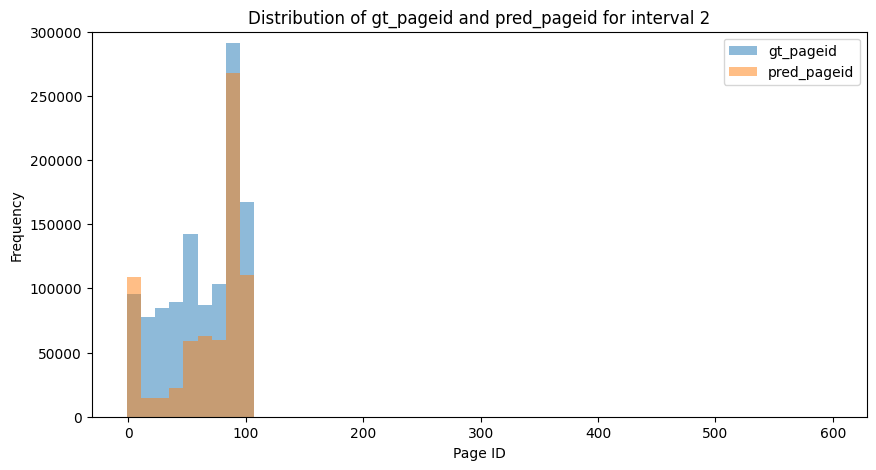

Interval 3: 100 unique gt_pageid
Interval 3: 991400 gt_pageid


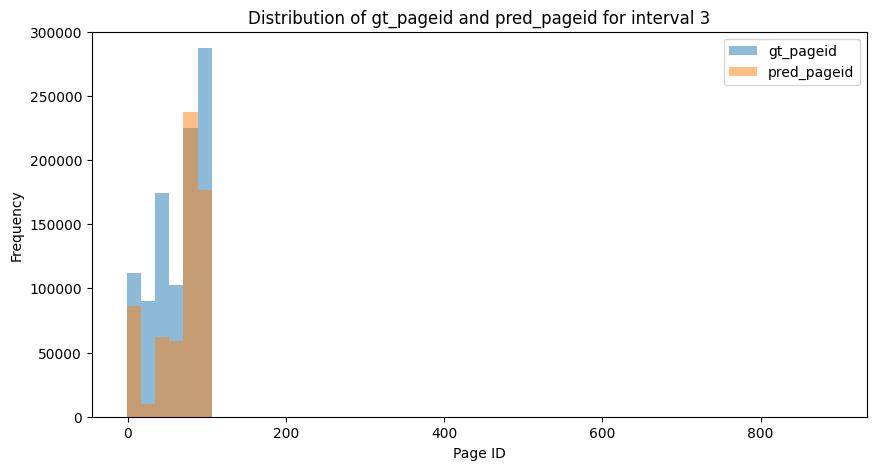

In [21]:
# Lets plots the distributions of gt_pageid and pred_pageid for time intervals based on step_size
# plots num_plots of these distributions
import matplotlib.pyplot as plt
import numpy as np

for i in range(num_plots):
    # Get the start and end time for the interval
    start_time = i * step_size
    end_time = (i + 1) * step_size

    # Get the data for the interval
    df_interval = df[(df['in_lock_start_time'] >= start_time) & (df['in_lock_start_time'] < end_time)]

    # Print the number of unique gt_pageid in the interval
    print(f'Interval {i}: {df_interval["gt_pageid"].nunique()} unique gt_pageid')
    # Print the count of gt_pageid in the interval
    print(f'Interval {i}: {df_interval["gt_pageid"].count()} gt_pageid')

    # Convert pred_pageid to numeric, coerce errors to NaN and drop them for histogram
    pred_pageid_numeric = pd.to_numeric(df_interval['pred_pageid'], errors='coerce').dropna()

    # Compute combined min/max for bins
    all_pageids = pd.concat([df_interval['gt_pageid'], pred_pageid_numeric])
    bins = np.histogram_bin_edges(all_pageids, bins=50)

    # Plot the distributions of gt_pageid and pred_pageid using the same bins
    plt.figure(figsize=(10, 5))
    plt.hist(df_interval['gt_pageid'], bins=bins, alpha=0.5, label='gt_pageid')
    plt.hist(pred_pageid_numeric, bins=bins, alpha=0.5, label='pred_pageid')
    plt.title(f'Distribution of gt_pageid and pred_pageid for interval {i}')
    plt.xlabel('Page ID')
    plt.ylabel('Frequency')
    plt.ylim(0, 300_000)
    plt.legend()
    plt.show()